In [1]:
import pickle
import _init_paths
import tensorflow as tf
import numpy as np

from configs.exp_configs import tf_exp_cfg as exp_cfg, nengo_dl_cfg as ngo_cfg
from utils.nengo_dl_utils import get_nengo_dl_model
from utils.base_utils.exp_utils import (plot_ndl_otpt_layer, plot_ndl_layer_spikes, plot_entire_network_info,
                                        plot_comparison_between_spiking_and_relu, get_tf_non_spiking_relu_results)

/home/rgaurav/miniconda3/envs/nengo-tf/lib/python3.7/site-packages/nengo_dl/converter.py:360: UserWarning: Layer '<class 'tensorflow.python.keras.layers.normalization_v2.BatchNormalization'>' already has a converter. Overwriting.
  "Layer '%s' already has a converter. Overwriting." % keras_layer


In [2]:
#relu_ndl_otpt = get_tf_non_spiking_relu_results()

ngo_cfg["sfr"], ngo_cfg["n_steps"] = 250, 80
ngo_cfg["ndl_res_otpt_dir"] = "/scratch/rgaurav/spiking_investigation/experiment_outputs/cifar10/model_1/ndl_spkg_results/"
spks_ndl_otpt = pickle.load(open(ngo_cfg["ndl_res_otpt_dir"]+"ndl_model_1_results_sfr_%s_nstps_%s.p"  
                                 % (ngo_cfg["sfr"], ngo_cfg["n_steps"]), "rb"))
(_, _), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [3]:
print("Keys: {}".format(spks_ndl_otpt.keys()))
print("For Output Layer metrics: \"acc_res\", Number of test data points", len(spks_ndl_otpt["acc_res"]))
print("Number of Elements in each ndl_otpt[\"acc_res\"]: ", len(spks_ndl_otpt["acc_res"][0]))
print("First element is True Class: %s, Second Element is Predicted Class: %s" 
      % (spks_ndl_otpt["acc_res"][0][0], spks_ndl_otpt["acc_res"][0][1]))
print("Third element is the predicted probability output at each output neuron for each timestep", 
      spks_ndl_otpt["acc_res"][0][2].shape)

print("*"*90)
print("For the spiking layers, \"spk_res\" Number of elements,%s" % len(spks_ndl_otpt["spk_res"]))
print("Keys in \"spk_res\" dict of 0th element: ", spks_ndl_otpt["spk_res"][0].keys())
print("Key's values shape (n_steps x num_neurons):", spks_ndl_otpt["spk_res"][0]["conv2d.0"].shape)

test_index = 0 # A random test data index.
#dict_keys(['conv2d.0', 'conv2d_1.0', 'conv2d_2.0', 'conv2d_3.0', 'conv2d_4.0', 'dense.0', 'dense_1.0'])
spikes_matrix = spks_ndl_otpt["spk_res"][test_index]["conv2d.0"] * ngo_cfg["sfr"] * 0.001
#spks_fr_otpt = np.sum(spikes_matrix, axis=0) / (80 * 0.001)
spks_fr_otpt = spikes_matrix
print(spikes_matrix[:, 5]) # 5 is a random neuron here.

Keys: dict_keys(['acc_res', 'spk_res'])
For Output Layer metrics: "acc_res", Number of test data points 10000
Number of Elements in each ndl_otpt["acc_res"]:  3
First element is True Class: 3, Second Element is Predicted Class: 3
Third element is the predicted probability output at each output neuron for each timestep (80, 10)
******************************************************************************************
For the spiking layers, "spk_res" Number of elements,100
Keys in "spk_res" dict of 0th element:  dict_keys(['conv2d.0', 'conv2d_1.0', 'conv2d_2.0', 'conv2d_3.0', 'conv2d_4.0', 'dense.0', 'dense_1.0'])
Key's values shape (n_steps x num_neurons): (80, 32768)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0.]


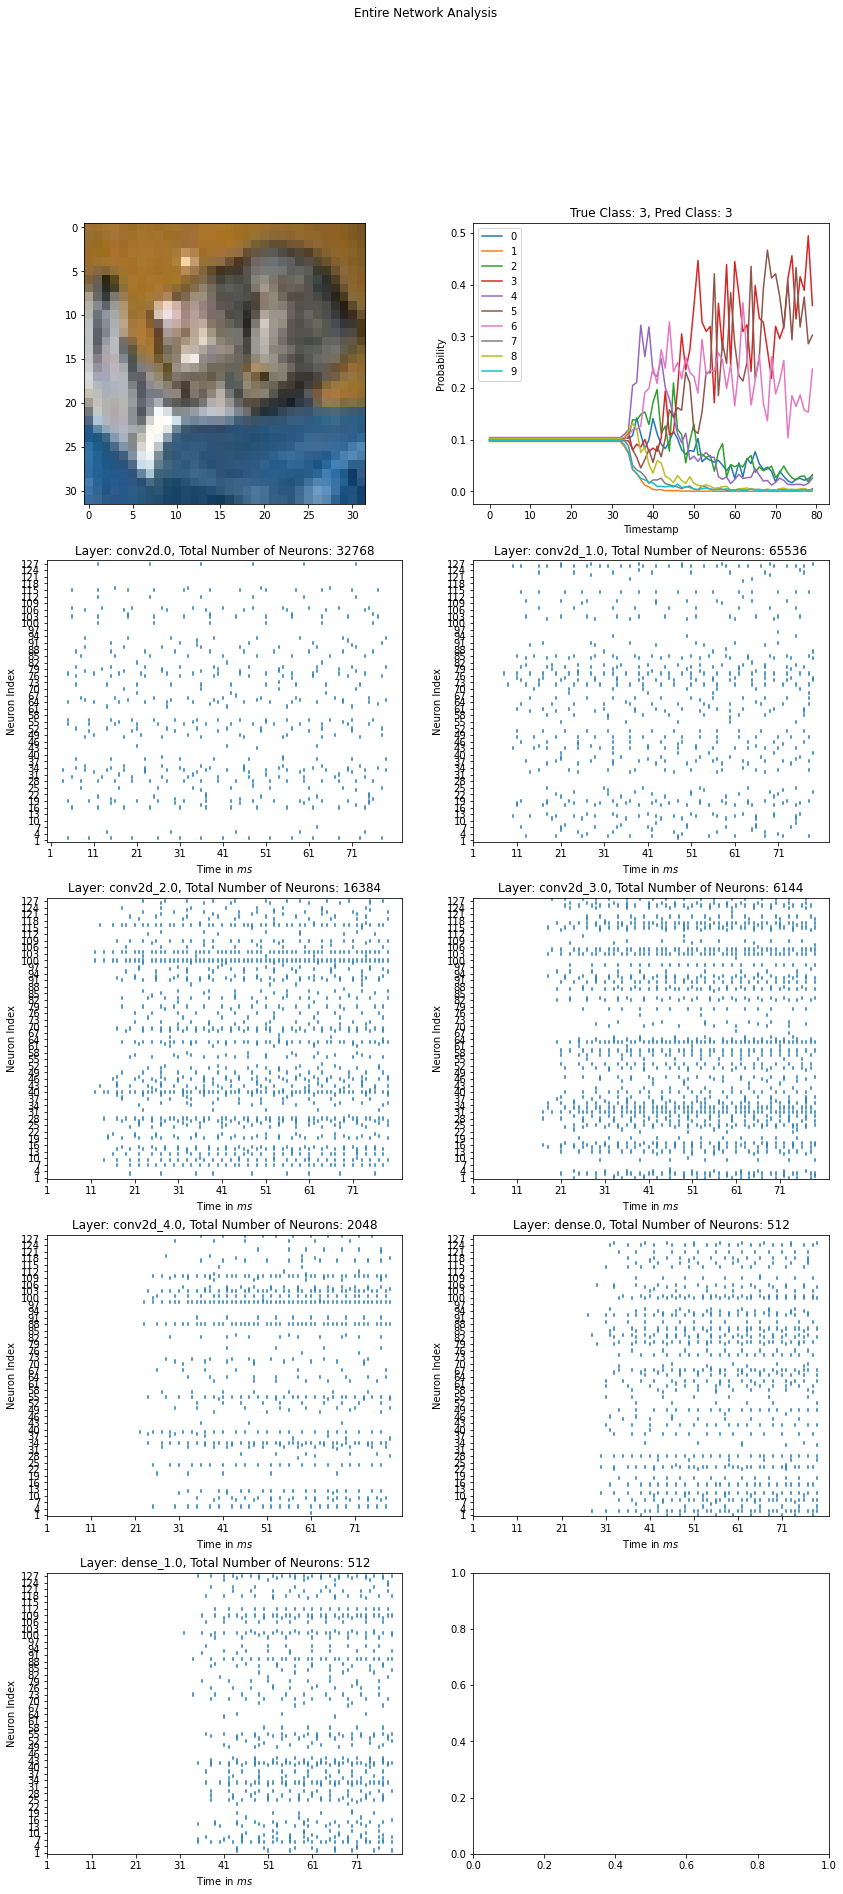

In [4]:
plot_entire_network_info(test_x[test_index], spks_ndl_otpt["spk_res"][test_index], 
                         spks_ndl_otpt["acc_res"][test_index], ngo_cfg["sfr"])

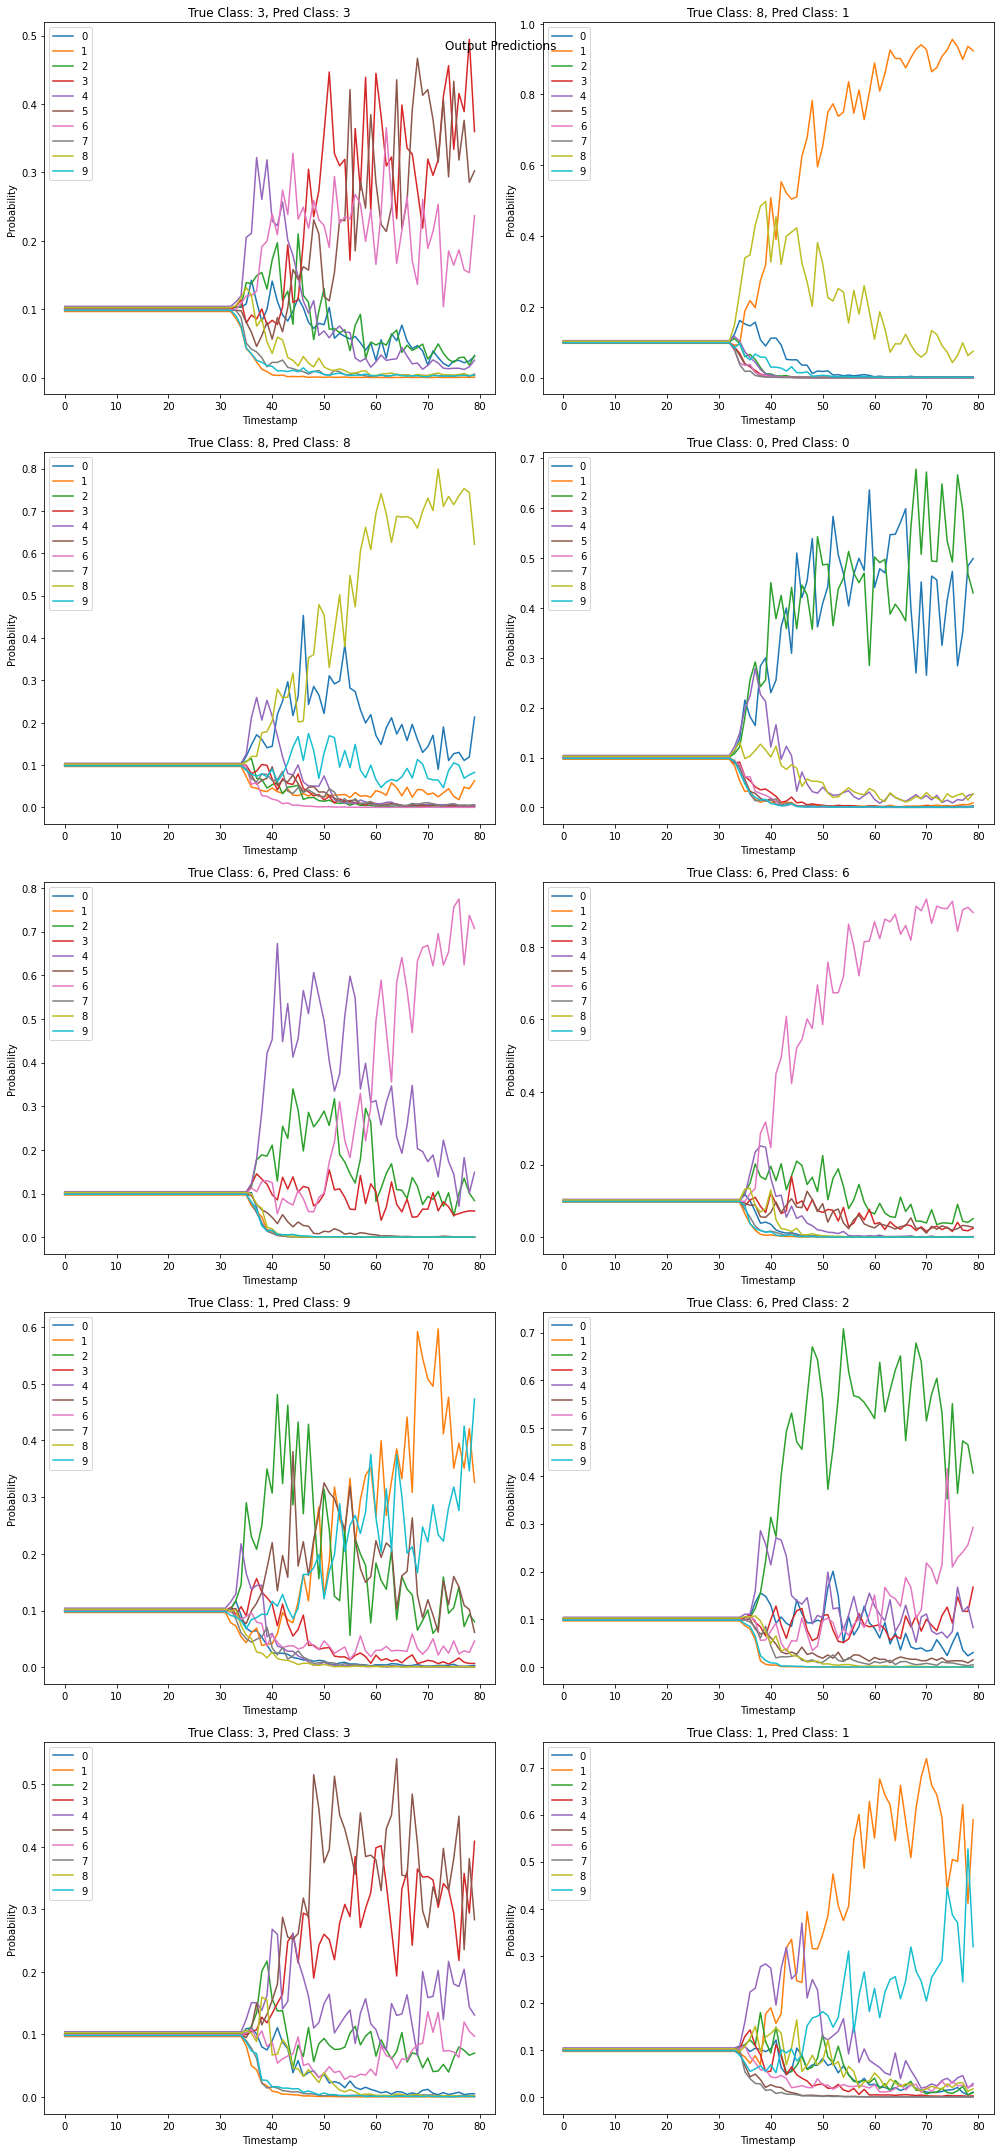

In [5]:
start = 0
plot_ndl_otpt_layer(start, spks_ndl_otpt["acc_res"][start:10])

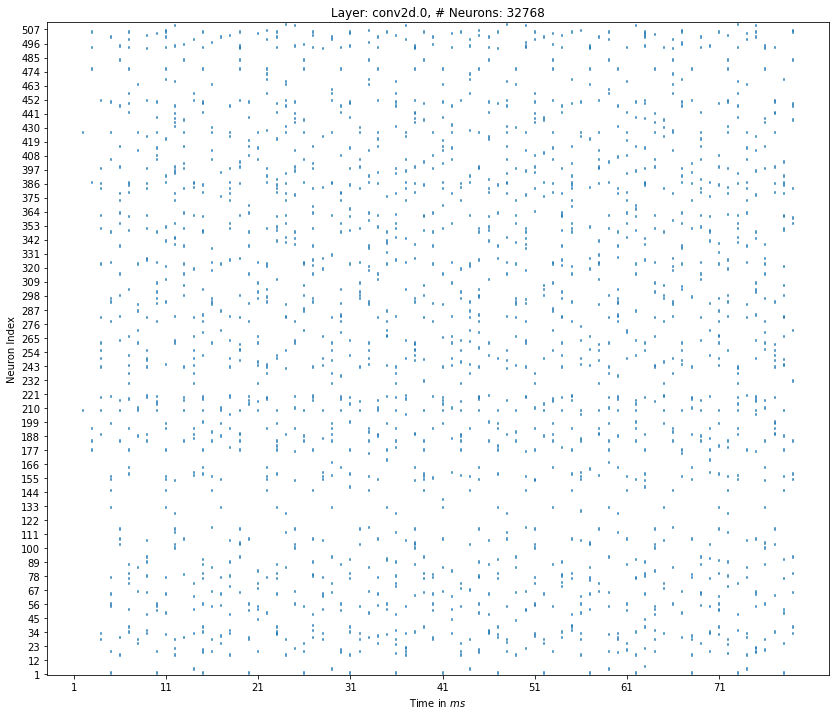

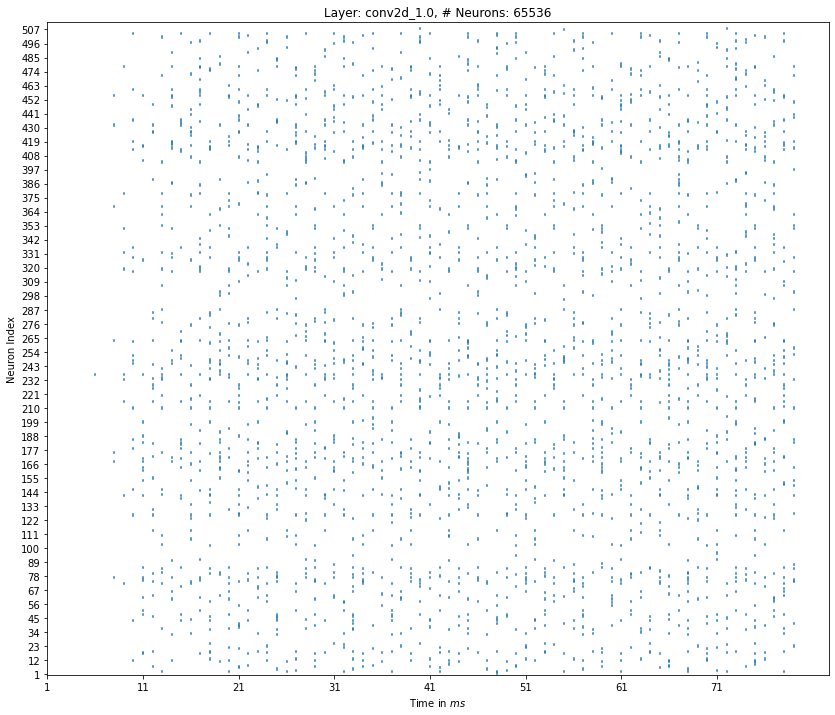

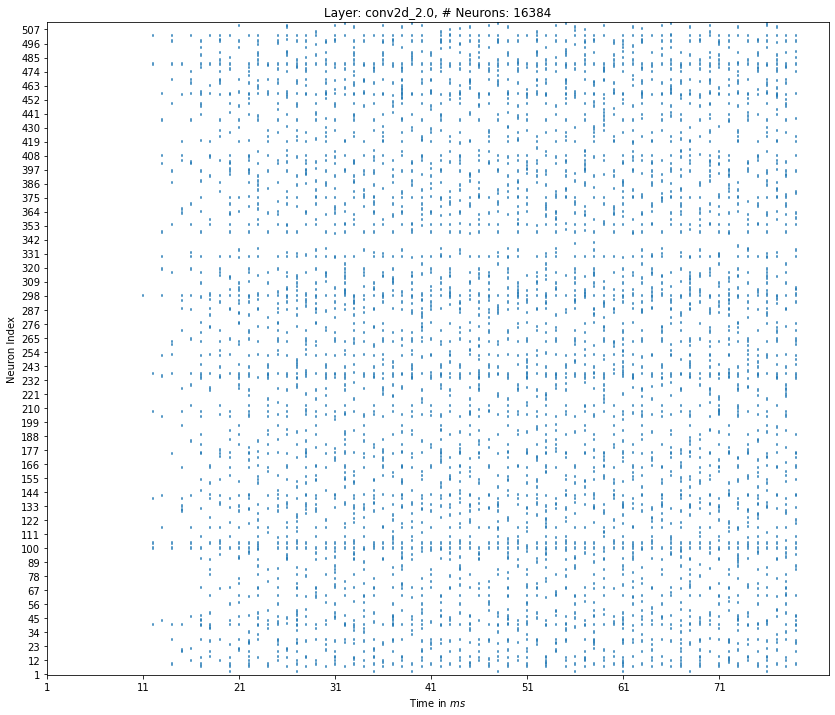

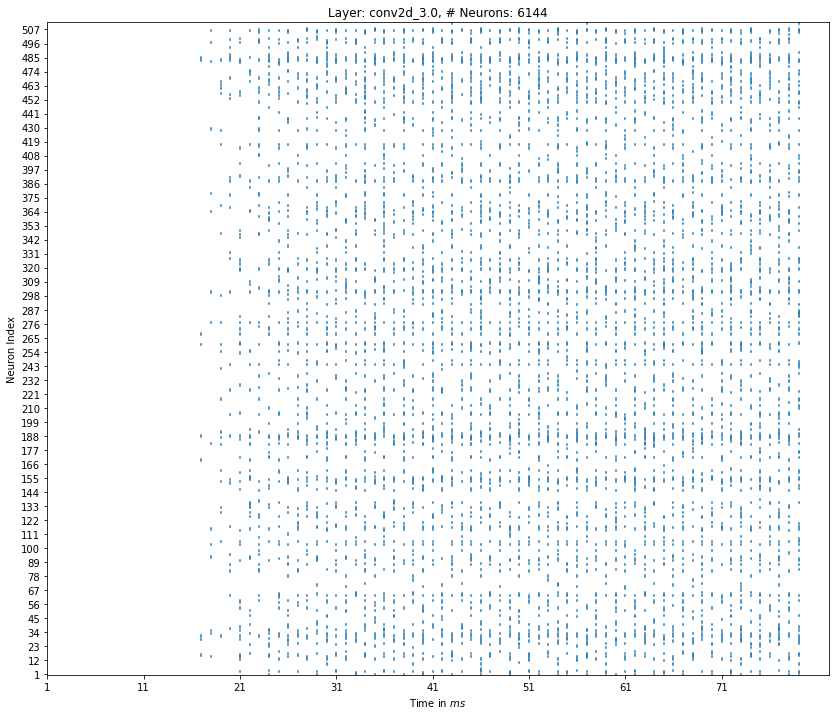

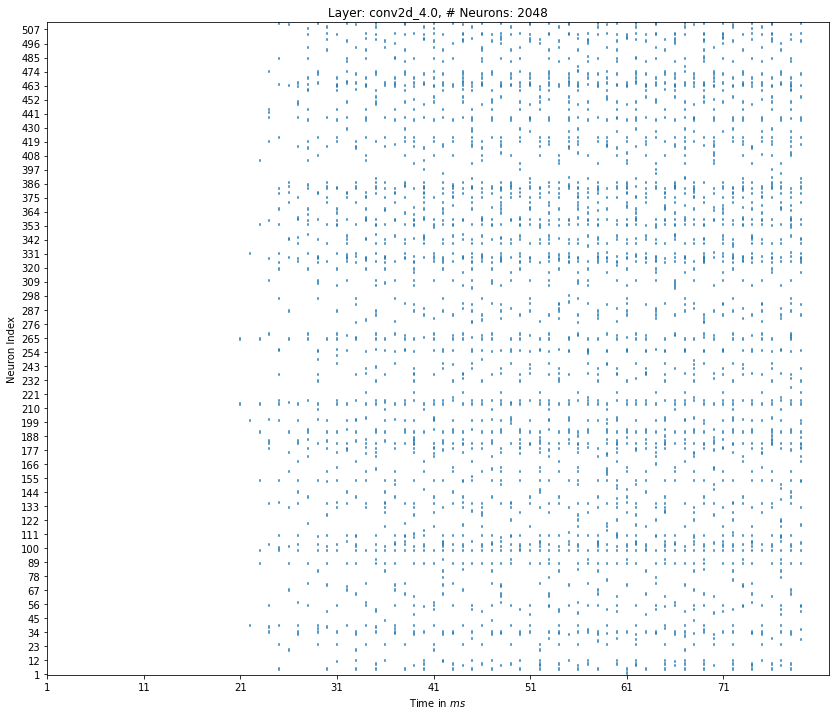

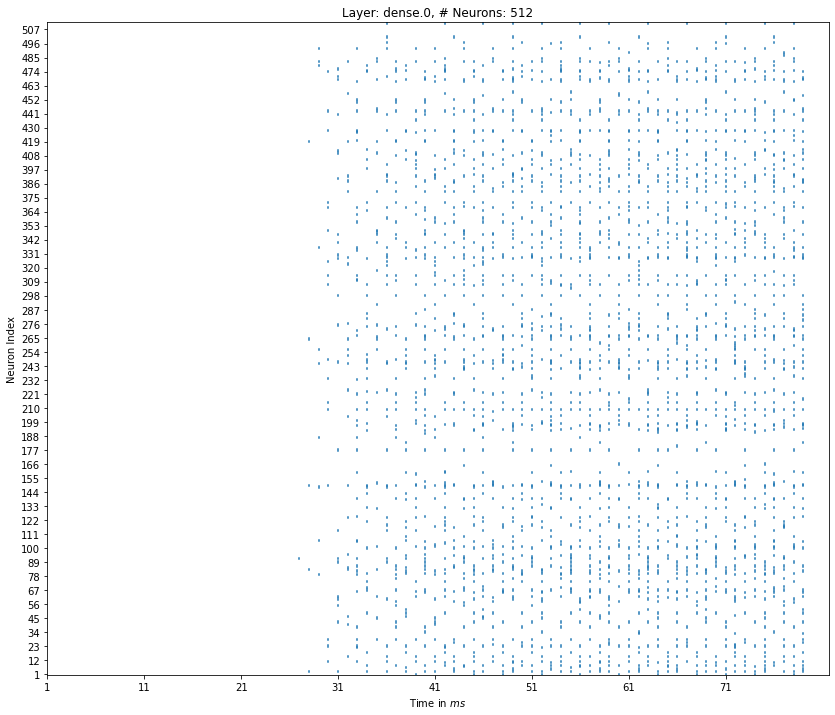

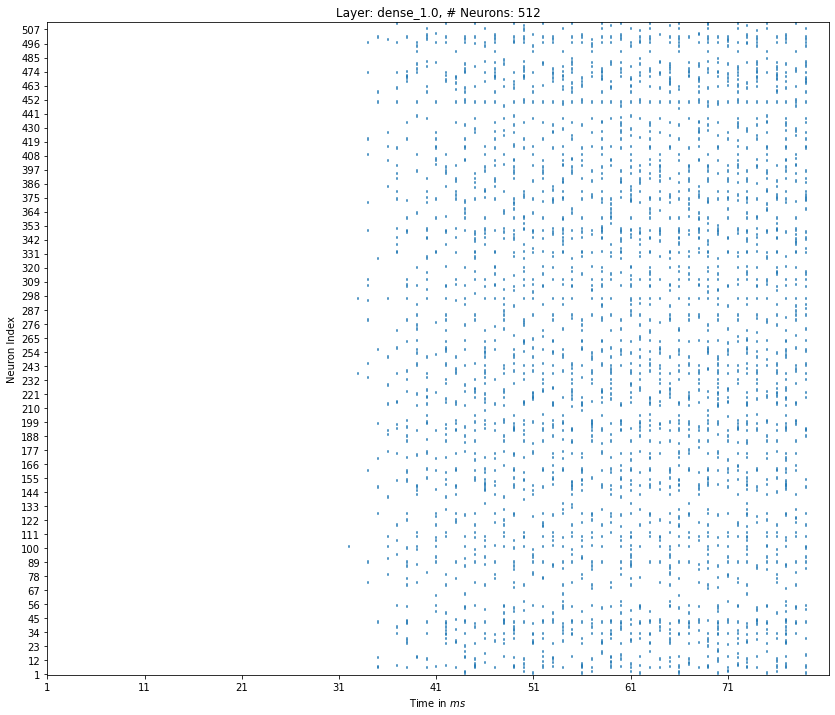

In [6]:
layer_names = ['conv2d.0', 'conv2d_1.0', 'conv2d_2.0', 'conv2d_3.0', 'conv2d_4.0', 'dense.0', 'dense_1.0']
# The index should be less than 100.
for lyr_name in layer_names:
  plot_ndl_layer_spikes(lyr_name, ngo_cfg["sfr"], spks_ndl_otpt["spk_res"][test_index][lyr_name], 
                        num_random_neurons=512)

In [7]:
plot_comparison_between_spiking_and_relu(ngo_cfg["sfr"], 
                                         {
                                             "acc_res": spks_ndl_otpt["acc_res"][test_index], 
                                             "spk_res": spks_ndl_otpt["spk_res"][test_index]
                                         },
                                         {
                                            "acc_res": relu_ndl_otpt["acc_res"][test_index],
                                             "spk_res": relu_ndl_otpt["spk_res"][test_index]
                                         },
                                        num_rndm_neurons=256)

NameError: name 'relu_ndl_otpt' is not defined